### 🔧 环境配置和检查

#### 概述

本教程需要特定的环境配置以确保最佳学习体验。以下配置将帮助您：

- 使用统一的conda环境：激活统一的学习环境
- 通过国内镜像源快速安装依赖：配置pip使用清华镜像源
- 加速模型下载：设置HuggingFace镜像代理
- 检查系统配置：检查硬件和软件配置

#### 配置

- **所需环境及其依赖已经部署好**
- 在`Notebook`右上角选择`jupyter内核`为`python(flyai_agent_in_action)`，即可执行下方代码

In [1]:
%%script bash

# 1. 激活 conda 环境 (仅对当前单元格有效)
eval "$(conda shell.bash hook)"
conda activate flyai_agent_in_action

echo "========================================="
echo "== Conda 环境检查报告 (仅针对当前 Bash 子进程) =="
echo "========================================="

# 2. 检查当前激活的环境
CURRENT_ENV_NAME=$(basename $CONDA_PREFIX)

if [ "$CURRENT_ENV_NAME" = "flyai_agent_in_action" ]; then
    echo "✅ 当前单元格已成功激活到 flyai_agent_in_action 环境。"
    echo "✅ 正在使用的环境路径: $CONDA_PREFIX"
    echo ""
    echo "💡 提示: 后续的 Python 单元格将使用 Notebook 当前选择的 Jupyter 内核。"
    echo "   如果需要后续单元格也使用此环境，请执行以下操作:"
    echo "   1. 检查 Notebook 右上角是否已选择 'python(flyai_agent_in_action)'。"
else
    echo "❌ 激活失败或环境名称不匹配。当前环境: $CURRENT_ENV_NAME"
    echo ""
    echo "⚠️ 严重提示: 建议将 Notebook 的 Jupyter **内核 (Kernel)** 切换为 'python(flyai_agent_in_action)'。"
    echo "   (通常位于 Notebook 右上角或 '内核' 菜单中)"
    echo ""
    echo "📚 备用方法 (不推荐): 如果无法切换内核，则必须在**每个**代码单元格的头部重复以下命令:"
    echo ""
    echo "%%script bash"
    echo "# 必须在每个单元格都执行"
    echo "eval \"\$(conda shell.bash hook)\""
    echo "conda activate flyai_agent_in_action"
fi

echo "=========================================" 

== Conda 环境检查报告 (仅针对当前 Bash 子进程) ==
✅ 当前单元格已成功激活到 flyai_agent_in_action 环境。
✅ 正在使用的环境路径: /workspace/envs/flyai_agent_in_action

💡 提示: 后续的 Python 单元格将使用 Notebook 当前选择的 Jupyter 内核。
   如果需要后续单元格也使用此环境，请执行以下操作:
   1. 检查 Notebook 右上角是否已选择 'python(flyai_agent_in_action)'。


In [2]:
# 2. 设置pip 为清华源
%pip config set global.index-url https://pypi.tuna.tsinghua.edu.cn/simple
%pip config list


Writing to /root/.config/pip/pip.conf
Note: you may need to restart the kernel to use updated packages.
global.index-url='https://pypi.tuna.tsinghua.edu.cn/simple'
:env:.target=''
Note: you may need to restart the kernel to use updated packages.


In [3]:
# 3. 设置HuggingFace代理
%env HF_ENDPOINT=https://hf-mirror.com
# 验证：使用shell命令检查
!echo $HF_ENDPOINT

env: HF_ENDPOINT=https://hf-mirror.com
https://hf-mirror.com


In [4]:
# 🔍 环境信息检查脚本
#
# 本脚本的作用：
# 1. 安装 pandas 库用于数据表格展示
# 2. 检查系统的各项配置信息
# 3. 生成详细的环境报告表格
#
# 对于初学者来说，这个步骤帮助您：
# - 了解当前运行环境的硬件配置
# - 确认是否满足模型运行的最低要求
# - 学习如何通过代码获取系统信息

# 安装 pandas 库 - 用于创建和展示数据表格
# pandas 是 Python 中最流行的数据处理和分析库
%pip install pandas==2.2.2 tabulate==0.9.0

import platform # 导入 platform 模块以获取系统信息
import os # 导入 os 模块以与操作系统交互
import subprocess # 导入 subprocess 模块以运行外部命令
import pandas as pd # 导入 pandas 模块，通常用于数据处理，这里用于创建表格
import shutil # 导入 shutil 模块以获取磁盘空间信息

# 获取 CPU 信息的函数，包括核心数量
def get_cpu_info():
    cpu_info = "" # 初始化 CPU 信息字符串
    physical_cores = "N/A"
    logical_cores = "N/A"

    if platform.system() == "Windows": # 如果是 Windows 系统
        cpu_info = platform.processor() # 使用 platform.processor() 获取 CPU 信息
        try:
            # 获取 Windows 上的核心数量 (需要 WMI)
            import wmi
            c = wmi.WMI()
            for proc in c.Win32_Processor():
                physical_cores = proc.NumberOfCores
                logical_cores = proc.NumberOfLogicalProcessors
        except:
            pass # 如果 WMI 不可用，忽略错误

    elif platform.system() == "Darwin": # 如果是 macOS 系统
        # 在 macOS 上使用 sysctl 命令获取 CPU 信息和核心数量
        os.environ['PATH'] = os.environ['PATH'] + os.pathsep + '/usr/sbin' # 更新 PATH 环境变量
        try:
            process_brand = subprocess.Popen(['sysctl', "machdep.cpu.brand_string"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_brand, stderr_brand = process_brand.communicate()
            cpu_info = stdout_brand.decode().split(': ')[1].strip() if stdout_brand else "Could not retrieve CPU info"

            process_physical = subprocess.Popen(['sysctl', "hw.physicalcpu"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_physical, stderr_physical = process_physical.communicate()
            physical_cores = stdout_physical.decode().split(': ')[1].strip() if stdout_physical else "N/A"

            process_logical = subprocess.Popen(['sysctl', "hw.logicalcpu"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_logical, stderr_logical = process_logical.communicate()
            logical_cores = stdout_logical.decode().split(': ')[1].strip() if stdout_logical else "N/A"

        except:
            cpu_info = "Could not retrieve CPU info"
            physical_cores = "N/A"
            logical_cores = "N/A"

    else:  # Linux 系统
        try:
            # 在 Linux 上读取 /proc/cpuinfo 文件获取 CPU 信息和核心数量
            with open('/proc/cpuinfo') as f:
                physical_cores_count = 0
                logical_cores_count = 0
                cpu_info_lines = []
                for line in f:
                    if line.startswith('model name'): # 查找以 'model name'开头的行
                        if not cpu_info: # 只获取第一个 model name
                            cpu_info = line.split(': ')[1].strip()
                    elif line.startswith('cpu cores'): # 查找以 'cpu cores' 开头的行
                        physical_cores_count = int(line.split(': ')[1].strip())
                    elif line.startswith('processor'): # 查找以 'processor' 开头的行
                        logical_cores_count += 1
                physical_cores = str(physical_cores_count) if physical_cores_count > 0 else "N/A"
                logical_cores = str(logical_cores_count) if logical_cores_count > 0 else "N/A"
                if not cpu_info:
                     cpu_info = "Could not retrieve CPU info"

        except:
            cpu_info = "Could not retrieve CPU info"
            physical_cores = "N/A"
            logical_cores = "N/A"

    return f"{cpu_info} ({physical_cores} physical cores, {logical_cores} logical cores)" # 返回 CPU 信息和核心数量


# 获取内存信息的函数
def get_memory_info():
    mem_info = "" # 初始化内存信息字符串
    if platform.system() == "Windows":
        # 在 Windows 上不容易通过标准库获取，需要外部库或 PowerShell
        mem_info = "Requires external tools on Windows" # 设置提示信息
    elif platform.system() == "Darwin": # 如果是 macOS 系统
        # 在 macOS 上使用 sysctl 命令获取内存大小
        process = subprocess.Popen(['sysctl', "hw.memsize"], stdout=subprocess.PIPE, stderr=subprocess.PIPE) # 运行 sysctl 命令
        stdout, stderr = process.communicate() # 获取标准输出和标准错误
        mem_bytes = int(stdout.decode().split(': ')[1].strip()) # 解析输出，获取内存大小（字节）
        mem_gb = mem_bytes / (1024**3) # 转换为 GB
        mem_info = f"{mem_gb:.2f} GB" # 格式化输出
    else:  # Linux 系统
        try:
            # 在 Linux 上读取 /proc/meminfo 文件获取内存信息
            with open('/proc/meminfo') as f:
                total_mem_kb = 0
                available_mem_kb = 0
                for line in f:
                    if line.startswith('MemTotal'): # 查找以 'MemTotal' 开头的行
                        total_mem_kb = int(line.split(':')[1].strip().split()[0]) # 解析行，获取总内存（KB）
                    elif line.startswith('MemAvailable'): # 查找以 'MemAvailable' 开头的行
                         available_mem_kb = int(line.split(':')[1].strip().split()[0]) # 解析行，获取可用内存（KB）

                if total_mem_kb > 0:
                    total_mem_gb = total_mem_kb / (1024**2) # 转换为 GB
                    mem_info = f"{total_mem_gb:.2f} GB" # 格式化输出总内存
                    if available_mem_kb > 0:
                        available_mem_gb = available_mem_kb / (1024**2)
                        mem_info += f" (Available: {available_mem_gb:.2f} GB)" # 添加可用内存信息
                else:
                     mem_info = "Could not retrieve memory info" # 如果读取文件出错，设置错误信息

        except:
            mem_info = "Could not retrieve memory info" # 如果读取文件出错，设置错误信息
    return mem_info # 返回内存信息

# 获取 GPU 信息的函数，包括显存
def get_gpu_info():
    try:
        # 尝试使用 nvidia-smi 获取 NVIDIA GPU 信息和显存
        result = subprocess.run(['nvidia-smi', '--query-gpu=name,memory.total', '--format=csv,noheader'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            gpu_lines = result.stdout.strip().split('\n') # 解析输出，获取 GPU 名称和显存
            gpu_info_list = []
            for line in gpu_lines:
                name, memory = line.split(', ')
                gpu_info_list.append(f"{name} ({memory})") # 格式化 GPU 信息
            return ", ".join(gpu_info_list) if gpu_info_list else "NVIDIA GPU found, but info not listed" # 返回 GPU 信息或提示信息
        else:
             # 尝试使用 lshw 获取其他 GPU 信息 (需要安装 lshw)
            try:
                result_lshw = subprocess.run(['lshw', '-C', 'display'], capture_output=True, text=True)
                if result_lshw.returncode == 0: # 如果命令成功执行
                     # 简单解析输出中的 product 名称和显存
                    gpu_info_lines = []
                    current_gpu = {}
                    for line in result_lshw.stdout.splitlines():
                        if 'product:' in line:
                             if current_gpu:
                                 gpu_info_lines.append(f"{current_gpu.get('product', 'GPU')} ({current_gpu.get('memory', 'N/A')})")
                             current_gpu = {'product': line.split('product:')[1].strip()}
                        elif 'size:' in line and 'memory' in line:
                             current_gpu['memory'] = line.split('size:')[1].strip()

                    if current_gpu: # 添加最后一个 GPU 的信息
                        gpu_info_lines.append(f"{current_gpu.get('product', 'GPU')} ({current_gpu.get('memory', 'N/A')})")

                    return ", ".join(gpu_info_lines) if gpu_info_lines else "GPU found (via lshw), but info not parsed" # 如果找到 GPU 但信息无法解析，设置提示信息
                else:
                    return "No GPU found (checked nvidia-smi and lshw)" # 如果两个命令都找不到 GPU，设置提示信息
            except FileNotFoundError:
                 return "No GPU found (checked nvidia-smi, lshw not found)" # 如果找不到 lshw 命令，设置提示信息
    except FileNotFoundError:
        return "No GPU found (nvidia-smi not found)" # 如果找不到 nvidia-smi 命令，设置提示信息


# 获取 CUDA 版本的函数
def get_cuda_version():
    try:
        # 尝试使用 nvcc --version 获取 CUDA 版本
        result = subprocess.run(['nvcc', '--version'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            for line in result.stdout.splitlines():
                if 'release' in line: # 查找包含 'release' 的行
                    return line.split('release ')[1].split(',')[0] # 解析行，提取版本号
        return "CUDA not found or version not parsed" # 如果找不到 CUDA 或版本无法解析，设置提示信息
    except FileNotFoundError:
        return "CUDA not found" # 如果找不到 nvcc 命令，设置提示信息

# 获取 Python 版本的函数
def get_python_version():
    return platform.python_version() # 获取 Python 版本

# 获取 Conda 版本的函数
def get_conda_version():
    try:
        # 尝试使用 conda --version 获取 Conda 版本
        result = subprocess.run(['conda', '--version'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            return result.stdout.strip() # 返回 Conda 版本
        return "Conda not found or version not parsed" # 如果找不到 Conda 或版本无法解析，设置提示信息
    except FileNotFoundError:
        return "Conda not found" # 如果找不到 conda 命令，设置提示信息

# 获取物理磁盘空间信息的函数
def get_disk_space():
    try:
        total, used, free = shutil.disk_usage("/") # 获取根目录的磁盘使用情况
        total_gb = total / (1024**3) # 转换为 GB
        used_gb = used / (1024**3) # 转换为 GB
        free_gb = free / (1024**3) # 转换为 GB
        return f"Total: {total_gb:.2f} GB, Used: {used_gb:.2f} GB, Free: {free_gb:.2f} GB" # 格式化输出
    except Exception as e:
        return f"Could not retrieve disk info: {e}" # 如果获取信息出错，设置错误信息

# 获取环境信息
os_name = platform.system() # 获取操作系统名称
os_version = platform.release() # 获取操作系统版本
if os_name == "Linux":
    try:
        # 在 Linux 上尝试获取发行版和版本
        lsb_info = subprocess.run(['lsb_release', '-a'], capture_output=True, text=True)
        if lsb_info.returncode == 0: # 如果命令成功执行
            for line in lsb_info.stdout.splitlines():
                if 'Description:' in line: # 查找包含 'Description:' 的行
                    os_version = line.split('Description:')[1].strip() # 提取描述信息作为版本
                    break # 找到后退出循环
                elif 'Release:' in line: # 查找包含 'Release:' 的行
                     os_version = line.split('Release:')[1].strip() # 提取版本号
                     # 尝试获取 codename
                     try:
                         codename_info = subprocess.run(['lsb_release', '-c'], capture_output=True, text=True)
                         if codename_info.returncode == 0:
                             os_version += f" ({codename_info.stdout.split(':')[1].strip()})" # 将 codename 添加到版本信息中
                     except:
                         pass # 如果获取 codename 失败则忽略

    except FileNotFoundError:
        pass # lsb_release 可能未安装，忽略错误

full_os_info = f"{os_name} {os_version}" # 组合完整的操作系统信息
cpu_info = get_cpu_info() # 调用函数获取 CPU 信息和核心数量
memory_info = get_memory_info() # 调用函数获取内存信息
gpu_info = get_gpu_info() # 调用函数获取 GPU 信息和显存
cuda_version = get_cuda_version() # 调用函数获取 CUDA 版本
python_version = get_python_version() # 调用函数获取 Python 版本
conda_version = get_conda_version() # 调用函数获取 Conda 版本
disk_info = get_disk_space() # 调用函数获取物理磁盘空间信息


# 创建用于存储数据的字典
env_data = {
    "项目": [ # 项目名称列表
        "操作系统",
        "CPU 信息",
        "内存信息",
        "GPU 信息",
        "CUDA 信息",
        "Python 版本",
        "Conda 版本",
        "物理磁盘空间" # 添加物理磁盘空间
    ],
    "信息": [ # 对应的信息列表
        full_os_info,
        cpu_info,
        memory_info,
        gpu_info,
        cuda_version,
        python_version,
        conda_version,
        disk_info # 添加物理磁盘空间信息
    ]
}

# 创建一个 pandas DataFrame
df = pd.DataFrame(env_data)

# 打印表格
print("### 环境信息") # 打印标题
print(df.to_markdown(index=False)) # 将 DataFrame 转换为 Markdown 格式并打印，不包含索引


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
### 环境信息
| 项目         | 信息                                                                  |
|:-------------|:----------------------------------------------------------------------|
| 操作系统     | Linux 5.15.0-126-generic                                              |
| CPU 信息     | Intel(R) Xeon(R) Platinum 8468 (48 physical cores, 192 logical cores) |
| 内存信息     | 2015.36 GB (Available: 1869.00 GB)                                    |
| GPU 信息     | No GPU found (checked nvidia-smi, lshw not found)                     |
| CUDA 信息    | 12.6                                                                  |
| Python 版本  | 3.12.11                                                               |
| Conda 版本   | conda 25.7.0                                                          |
| 物理磁盘空间 | Total: 2014.78 GB, Used: 788.88 GB, Free: 1123.48 GB                  |


# 🔬 深度研究助手 - 智能体评估版

## 📖 教程概述

本教程将在深度研究助手的基础上，集成 **Langfuse** 可观测性平台，实现智能体的全面评估和监控。我们将学习如何：

- **🔍 实时追踪**：监控研究助手的每个执行步骤
- **📊 性能评估**：分析成本、延迟、准确性等关键指标  
- **👥 用户反馈**：收集和分析用户对研究结果的反馈
- **🎯 离线评估**：使用基准数据集进行系统性测试

## 🎯 研究助手回顾

我们的深度研究助手是一个基于 LangGraph 的多智能体系统：

### 核心功能模块
- **📝 分析师生成**：根据研究主题自动创建专业分析师团队
- **🤝 人机协同**：通过人类反馈优化分析师配置
- **💬 专家访谈**：每位分析师与 AI 专家进行深度对话
- **🔍 并行搜索**：从多个源（网络、百科）检索相关信息
- **📄 报告生成**：将访谈结果整合为结构化报告

### 🔬 智能体评估的重要性

在部署研究助手到生产环境前，评估是确保系统质量的关键环节：

- **🐛 问题诊断**：快速定位研究流程中的问题节点
- **📈 性能优化**：识别高成本操作并进行优化
- **🎯 质量保证**：确保生成的研究报告达到预期标准
- **📊 持续改进**：通过数据驱动的方式提升系统表现

![深度研究助手架构图](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbb164d61c93d48e604091_research-assistant1.png)

---

## 🧪 本教程特色

- **📚 初学者友好**：详细的中文注释和概念解释
- **🔧 实战导向**：基于真实业务场景的评估方案
- **📊 全面监控**：覆盖在线和离线两种评估模式
- **🎯 可操作**：提供具体的优化建议和最佳实践

In [5]:
%%capture --no-stderr
# 📦 安装项目所需的Python包（带评估功能）
# 使用 %%capture --no-stderr 来隐藏安装过程中的输出信息，保持notebook整洁

# 🔬 智能体评估版本包含额外的 Langfuse 支持
%pip install langgraph==0.6.7 langchain_openai==0.3.31 langchain_community==0.3.27 langchain_core==0.3.75 tavily-python==0.7.12 wikipedia==1.4.0 langfuse==3.3.0

# 📚 各包功能说明：
# 核心框架：
# - langgraph==0.6.7: LangGraph框架，用于构建多智能体工作流
# - langchain_openai==0.3.31: LangChain的OpenAI集成，用于调用GPT模型
# - langchain_community==0.3.27: LangChain社区工具集，包含各种第三方集成
# - langchain_core==0.3.75: LangChain核心组件，提供基础功能

# 数据检索：
# - tavily-python==0.7.12: Tavily搜索API客户端，用于网络搜索
# - wikipedia==1.4.0: 维基百科API客户端，用于百科搜索
# - baike_loader.py: 百度百科加载器（本仓库内置）

# 🔬 评估与监控（新增）：
# - langfuse==3.3.0: LLM应用的可观测性和评估平台，支持追踪、监控和评估

## 环境准备（Setup）

In [6]:
import os, getpass

def _set_env(var: str):
    """
    安全设置环境变量的辅助函数

    参数:
        var (str): 环境变量名称

    功能:
        - 检查环境变量是否已存在
        - 如果不存在，则通过getpass安全地获取用户输入
        - 将用户输入设置为环境变量值
    """
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# 🤖 设置 OpenAI API 密钥
# 这是使用 OpenAI 模型所必需的，用于身份验证
_set_env("OPENAI_API_KEY")

# 设置 OpenAI API代理地址 (例如：https://api.apiyi.com/v1）
# 用于配置API请求的基础URL，支持使用代理服务
_set_env("OPENAI_BASE_URL")

# 🔬 设置 Langfuse API 密钥（智能体评估必需）
# Langfuse 是用于 LLM 应用可观测性和评估的平台
# 注册地址：https://cloud.langfuse.com
print("🔬 配置 Langfuse 评估平台...")

# 公开密钥：用于标识你的项目
_set_env("LANGFUSE_PUBLIC_KEY")

# 秘密密钥：用于认证，请妥善保管
_set_env("LANGFUSE_SECRET_KEY")

# 服务器地址：选择离你最近的区域
# 🇪🇺 欧盟区域(推荐) https://cloud.langfuse.com
# 🇺🇸 美国区域 https://us.cloud.langfuse.com
_set_env("LANGFUSE_HOST")

print("✅ API 密钥配置完成！")
print("📊 智能体评估功能已启用")

OPENAI_API_KEY:  ········
OPENAI_BASE_URL:  ········


🔬 配置 Langfuse 评估平台...


LANGFUSE_PUBLIC_KEY:  ········
LANGFUSE_SECRET_KEY:  ········
LANGFUSE_HOST:  ········


✅ API 密钥配置完成！
📊 智能体评估功能已启用


In [7]:
# 🔧 初始化核心组件：LLM 和 Langfuse 客户端
from langchain_openai import ChatOpenAI
from langfuse import get_client

# 🤖 初始化OpenAI聊天模型
# 使用GPT-4o模型，这是OpenAI最新的多模态大语言模型
# temperature=0 确保输出结果具有确定性和一致性，适合需要稳定输出的场景
llm = ChatOpenAI(model="gpt-4o", temperature=0)

# 🔬 初始化 Langfuse 客户端（智能体评估核心）
# get_client() 会自动从环境变量中读取 API 凭证
langfuse = get_client()

# ✅ 验证 Langfuse 连接
if langfuse.auth_check():
    print("✅ Langfuse 客户端连接成功！")
    print("📊 智能体追踪和评估功能已就绪")
    print("🔗 访问仪表板: https://cloud.langfuse.com/traces")
else:
    print("❌ Langfuse 认证失败！请检查 API 密钥配置")
    print("💡 提示：请确保 LANGFUSE_PUBLIC_KEY、LANGFUSE_SECRET_KEY 和 LANGFUSE_HOST 正确设置")

print("\n🚀 深度研究助手（评估版）初始化完成！")

✅ Langfuse 客户端连接成功！
📊 智能体追踪和评估功能已就绪
🔗 访问仪表板: https://cloud.langfuse.com/traces

🚀 深度研究助手（评估版）初始化完成！


我们将使用 [LangSmith](https://docs.smith.langchain.com/) 进行[链路追踪（tracing）](https://docs.smith.langchain.com/concepts/tracing)，便于调试与分析。

In [8]:
# 🔬 设置 Langfuse 追踪配置（智能体评估必需）
# LangSmith和Langfuse都是优秀的追踪平台，这里我们使用Langfuse进行评估

# 设置LangSmith追踪配置（可选，用于额外的链路追踪）
# LangSmith是LangChain的官方监控和调试平台
_set_env("LANGSMITH_API_KEY")  # 设置LangSmith API密钥（可选）
os.environ["LANGSMITH_TRACING"] = "true"  # 启用链路追踪功能
os.environ["LANGSMITH_PROJECT"] = "DeepResearch-Assistant-Evaluation" # 设置项目名称

print("📊 追踪配置说明：")
print("  🔬 主要使用 Langfuse 进行智能体评估和监控")
print("  📈 可选启用 LangSmith 进行链路追踪补充")
print("  🎯 两个平台配合使用，提供全方位的可观测性")

LANGSMITH_API_KEY:  ········


📊 追踪配置说明：
  🔬 主要使用 Langfuse 进行智能体评估和监控
  📈 可选启用 LangSmith 进行链路追踪补充
  🎯 两个平台配合使用，提供全方位的可观测性


## 分析师：人机协同（Human-In-The-Loop）

通过人机协同的方式生成并审核分析师角色。

In [9]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

class Analyst(BaseModel):
    """
    分析师数据模型

    用于定义每个AI分析师的基本信息和角色特征
    每个分析师代表一个特定的研究视角和专长领域
    """
    affiliation: str = Field(
        description="分析师的主要隶属机构或组织",
    )
    name: str = Field(
        description="分析师姓名"
    )
    role: str = Field(
        description="分析师在研究主题中的具体角色定位",
    )
    description: str = Field(
        description="分析师的关注焦点、关切点和动机的详细描述",
    )

    @property
    def persona(self) -> str:
        """
        生成分析师人设描述

        返回:
            str: 格式化的分析师人设信息，用于后续的AI对话中
        """
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"

class Perspectives(BaseModel):
    """
    分析师集合数据模型

    用于存储和管理多个分析师的信息
    支持结构化输出，确保AI生成的分析师信息格式正确
    """
    analysts: List[Analyst] = Field(
        description="包含所有分析师角色和隶属机构的综合列表",
    )

class GenerateAnalystsState(TypedDict):
    """
    分析师生成状态管理

    用于在LangGraph工作流中管理分析师生成过程的状态信息
    """
    topic: str  # 研究主题
    max_analysts: int  # 分析师数量上限
    human_analyst_feedback: str  # 人类反馈信息，用于人机协同调整
    analysts: List[Analyst]  # 生成的分析师列表

🔬 智能体评估版分析师生成工作流构建完成！
📊 所有节点调用都会自动记录到 Langfuse 平台
🎯 主要评估指标：LLM 调用次数、令牌消耗、执行时间、路由决策

图可视化：


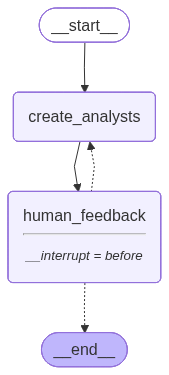

✅ 图渲染成功！


In [10]:
# 🔧 导入智能体评估所需的追踪组件
from IPython.display import Image, display
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

# 🔬 导入 Langfuse 追踪处理器（智能体评估核心）
from langfuse.langchain import CallbackHandler

# 分析师生成指令模板
# 这个提示词指导AI如何根据研究主题创建合适的分析师团队
analyst_instructions="""你需要创建一组 AI 分析师人设。请严格遵循以下指引：

1. 先审阅研究主题：
{topic}

2. 查看（可选的）编辑反馈，它将指导分析师的人设创建：

{human_analyst_feedback}

3. 基于上述文档与/或反馈，识别最值得关注的主题。

4. 选出前 {max_analysts} 个主题。

5. 为每个主题分配一位分析师。"""

def create_analysts(state: GenerateAnalystsState):
    """
    创建分析师人设的核心函数（带智能体评估）

    功能:
        1. 根据研究主题和人类反馈生成分析师团队
        2. 使用结构化输出确保生成的分析师信息格式正确
        3. 将生成的分析师信息存储到状态中
        4. 🔬 自动记录到 Langfuse 进行性能追踪

    参数:
        state: 包含研究主题、分析师数量限制和人类反馈的状态对象

    返回:
        dict: 包含生成的分析师列表的字典
    """
    # 从状态中提取必要信息
    topic = state['topic']
    max_analysts = state['max_analysts']
    human_analyst_feedback = state.get('human_analyst_feedback', '')

    # 配置结构化输出，确保返回Perspectives格式的数据
    structured_llm = llm.with_structured_output(Perspectives)

    # 构建系统消息，包含研究主题、反馈和数量限制
    system_message = analyst_instructions.format(
        topic=topic,
        human_analyst_feedback=human_analyst_feedback,
        max_analysts=max_analysts
    )

    # 🔬 智能体评估：使用 Langfuse 上下文管理器记录这次调用
    with langfuse.start_as_current_span(name="create_analysts") as span:
        # 调用大模型生成分析师集合
        analysts = structured_llm.invoke([
            SystemMessage(content=system_message),
            HumanMessage(content="生成分析师集合。")
        ])
        
        # 记录输入输出到 Langfuse
        span.update_trace(
            input={"topic": topic, "max_analysts": max_analysts, "feedback": human_analyst_feedback},
            output={"analysts_count": len(analysts.analysts), "analysts": [a.name for a in analysts.analysts]}
        )

    # 将分析师列表写入状态，供后续节点使用
    return {"analysts": analysts.analysts}

def human_feedback(state: GenerateAnalystsState):
    """
    人机协同中断点节点（带评估追踪）

    功能:
        - 作为工作流的中断点，允许人类审查和修改生成的分析师
        - 这是一个空操作节点，主要用于流程控制
        - 人类可以在此节点提供反馈，系统会根据反馈重新生成分析师
        - 🔬 记录人机交互数据到 Langfuse

    参数:
        state: 当前状态对象
    """
    # 🔬 智能体评估：记录人机交互节点
    with langfuse.start_as_current_span(name="human_feedback") as span:
        human_feedback_content = state.get('human_analyst_feedback', 'No feedback')
        span.update_trace(
            input={"current_analysts": len(state.get('analysts', []))},
            output={"feedback_provided": bool(human_feedback_content and human_feedback_content != 'No feedback')}
        )
    pass

def should_continue(state: GenerateAnalystsState):
    """
    条件路由函数：决定工作流的下一步执行（带评估记录）

    功能:
        - 检查是否有人类反馈
        - 如果有反馈，重新生成分析师
        - 如果没有反馈，结束流程
        - 🔬 记录路由决策到 Langfuse

    参数:
        state: 当前状态对象

    返回:
        str: 下一个要执行的节点名称
    """
    # 检查是否有人类反馈
    human_analyst_feedback = state.get('human_analyst_feedback', None)
    
    # 🔬 智能体评估：记录路由决策
    with langfuse.start_as_current_span(name="routing_decision") as span:
        if human_analyst_feedback:
            span.update_trace(
                input={"has_feedback": True, "feedback": human_analyst_feedback},
                output={"next_node": "create_analysts"}
            )
            return "create_analysts"  # 有反馈，重新生成分析师
        else:
            span.update_trace(
                input={"has_feedback": False},
                output={"next_node": "END"}
            )
            return END  # 没有反馈，结束流程

# 构建LangGraph工作流
builder = StateGraph(GenerateAnalystsState)

# 添加节点到工作流
builder.add_node("create_analysts", create_analysts)  # 分析师生成节点
builder.add_node("human_feedback", human_feedback)    # 人类反馈节点

# 添加边连接节点
builder.add_edge(START, "create_analysts")  # 开始 -> 生成分析师
builder.add_edge("create_analysts", "human_feedback")  # 生成分析师 -> 人类反馈

# 添加条件边：根据是否有反馈决定下一步
builder.add_conditional_edges(
    "human_feedback",
    should_continue,
    ["create_analysts", END]
)

# 编译工作流
memory = MemorySaver()  # 使用内存检查点保存状态
graph = builder.compile(
    interrupt_before=['human_feedback'],  # 在人类反馈节点前中断
    checkpointer=memory
)

# 展示图结构
print("🔬 智能体评估版分析师生成工作流构建完成！")
print("📊 所有节点调用都会自动记录到 Langfuse 平台")
print("🎯 主要评估指标：LLM 调用次数、令牌消耗、执行时间、路由决策")

# 图可视化
print("\n图可视化：")

# 方案1：尝试使用 Pyppeteer 本地渲染（推荐）
try:
    # 可视化：通过 Mermaid 渲染图结构
    display(Image(graph.get_graph(xray=1).draw_mermaid_png()))
    print("✅ 图渲染成功！")
except Exception as e:
    print(f"❌ Pyppeteer 渲染失败: {e}")
    
    # 方案2：显示 Mermaid 文本格式
    print("\n📝 图结构（Mermaid 文本格式）：")
    print("=" * 50)
    mermaid_text = graph.get_graph().draw_mermaid()
    print(mermaid_text)
    print("=" * 50)
    
    # 方案3：显示图的节点和边信息
    print("\n🔗 图结构信息：")
    print("节点:", list(graph.get_graph().nodes.keys()))
    print("边:", list(graph.get_graph().edges))
    
    # 方案4：提供手动渲染说明
    print("\n💡 手动渲染说明：")
    print("1. 复制上面的 Mermaid 文本")
    print("2. 访问 https://mermaid.live/")
    print("3. 粘贴文本到编辑器中查看图形")
    print("4. 或者使用支持 Mermaid 的 Markdown 编辑器")

![image-20250930152238678](https://cdn.jsdelivr.net/gh/Fly0905/note-picture@main/imag/202509301522726.png)

In [11]:
# 🔬 使用智能体评估功能运行分析师生成流程

# 🎯 输入参数
max_analysts = 3  # 分析师数量
topic = "采用LangGraph作为AI Agent框架的好处"  # 研究主题
thread = {"configurable": {"thread_id": "1"}}  # 线程ID，用于状态管理

# 🔬 初始化 Langfuse 回调处理器，自动追踪所有 LangChain 调用
langfuse_handler = CallbackHandler()

print("🚀 启动智能体评估版深度研究助手...")
print(f"📊 研究主题: {topic}")
print(f"👥 分析师数量: {max_analysts}")
print("🔬 所有执行步骤将自动记录到 Langfuse 进行评估")
print("-" * 60)

# 运行工作流直到第一个中断点（人类反馈节点）
# 🔬 启用 Langfuse 追踪
for event in graph.stream(
    {"topic": topic, "max_analysts": max_analysts}, 
    thread, 
    stream_mode="values",
    config={"callbacks": [langfuse_handler]}  # 启用智能体评估追踪
):
    # 检查并显示生成的分析师信息
    analysts = event.get('analysts', '')
    if analysts:
        print("✅ 分析师团队生成完成！以下是系统推荐的分析师：")
        print("=" * 60)
        for i, analyst in enumerate(analysts, 1):
            print(f"📋 分析师 {i}:")
            print(f"   姓名: {analyst.name}")
            print(f"   机构: {analyst.affiliation}")
            print(f"   角色: {analyst.role}")
            print(f"   描述: {analyst.description}")
            print("-" * 50)

print("\n🔬 智能体评估数据记录说明:")
print("📊 已记录指标:")
print("  - 🕐 执行时间: 每个节点的处理耗时")  
print("  - 💰 成本分析: LLM 调用的令牌消耗")
print("  - 🔄 路由决策: 工作流的执行路径")
print("  - 📈 成功率: 分析师生成的成功与失败")
print("🔗 访问 Langfuse 仪表板查看详细数据: https://cloud.langfuse.com/traces")

🚀 启动智能体评估版深度研究助手...
📊 研究主题: 采用LangGraph作为AI Agent框架的好处
👥 分析师数量: 3
🔬 所有执行步骤将自动记录到 Langfuse 进行评估
------------------------------------------------------------


TypeError: Pregel.stream() got multiple values for argument 'config'

In [ ]:
# 🔬 演示人机协同与评估反馈功能

# 获取当前状态，检查工作流进展
state = graph.get_state(thread)
print(f"🔍 当前工作流状态: {state.next}")
print("💡 系统正在等待人类反馈以优化分析师团队")

# 🔬 智能体评估：记录用户反馈事件
with langfuse.start_as_current_span(name="user_feedback_collection") as span:
    user_feedback = "加入一位来自初创公司的人，以增加创业者的视角"
    
    # 记录用户反馈到评估系统
    span.update_trace(
        input={"feedback_request": "优化分析师团队"},
        output={"user_feedback": user_feedback, "feedback_type": "add_perspective"}
    )
    
    print(f"👤 用户反馈: {user_feedback}")
    print("🔄 系统将根据反馈重新生成分析师团队...")

# 更新状态：提供人类反馈
graph.update_state(thread, {
    "human_analyst_feedback": user_feedback
}, as_node="human_feedback")

In [ ]:
# 🔄 继续执行工作流，观察反馈后的改进效果

print("🔄 根据用户反馈重新生成分析师团队...")
print("🔬 继续记录评估数据到 Langfuse 平台")
print("-" * 60)

# 继续图执行，启用评估追踪
for event in graph.stream(
    None, 
    thread, 
    stream_mode="values",
    config={"callbacks": [langfuse_handler]}  # 继续启用智能体评估追踪
):
    # 显示更新后的分析师信息
    analysts = event.get('analysts', '')
    if analysts:
        print("✅ 根据用户反馈重新生成的分析师团队：")
        print("=" * 60)
        for i, analyst in enumerate(analysts, 1):
            print(f"📋 分析师 {i}:")
            print(f"   姓名: {analyst.name}")
            print(f"   机构: {analyst.affiliation}")
            print(f"   角色: {analyst.role}")
            print(f"   描述: {analyst.description}")
            print("-" * 50)

print("\n🔬 人机协同评估指标记录:")
print("📊 新增评估数据:")
print("  - 👥 用户反馈质量: 反馈内容的有效性")
print("  - 🔄 迭代改进效果: 前后分析师团队的对比")
print("  - ⏱️ 反馈响应时间: 从反馈到重新生成的耗时")
print("  - 🎯 用户满意度: 改进后的结果质量")

In [ ]:
# 🔬 演示在线评估：用户反馈打分功能

print("🔬 演示在线评估功能：用户反馈收集")
print("=" * 50)

# 🔬 智能体评估：收集用户对分析师团队的反馈
def collect_user_feedback_on_analysts(analysts_list, langfuse_client):
    """
    收集用户对分析师团队的反馈评分
    
    这是在线评估的重要组成部分，用于：
    - 收集真实用户对 AI 输出的评价
    - 建立评估数据集用于模型改进
    - 监控系统性能随时间的变化
    """
    with langfuse_client.start_as_current_span(name="user_feedback_scoring") as span:
        # 模拟用户对分析师团队的评分
        user_score = 4  # 1-5 分，5分为最高
        feedback_comment = "分析师团队很好地覆盖了不同角度，创业者视角的加入特别有价值"
        
        # 记录到 Langfuse 用于分析
        span.score_trace(
            name="analyst_team_quality",
            value=user_score,
            data_type="NUMERIC",
            comment=feedback_comment
        )
        
        # 记录详细的反馈数据
        span.update_trace(
            input={"analysts_count": len(analysts_list), "analysts_roles": [a.role for a in analysts_list]},
            output={"user_score": user_score, "feedback": feedback_comment}
        )
        
        print(f"👤 用户评分: {user_score}/5")
        print(f"💬 用户评论: {feedback_comment}")
        
        return user_score, feedback_comment

# 获取最终的分析师团队
final_state = graph.get_state(thread)
analysts = final_state.values.get('analysts')

if analysts:
    # 收集用户反馈
    score, comment = collect_user_feedback_on_analysts(analysts, langfuse)
    
    print(f"\n✅ 分析师团队最终确定！")
    print(f"👥 团队规模: {len(analysts)} 位分析师")
    print(f"📊 用户满意度: {score}/5")
    
    print("\n🔬 在线评估数据记录完成：")
    print("  - ✅ 用户反馈评分已记录")
    print("  - 📈 系统性能指标已更新") 
    print("  - 🎯 质量改进数据已收集")
else:
    print("⚠️ 未找到分析师数据")

In [ ]:
# 🔬 完成分析师生成阶段，准备进入访谈评估阶段

# 确认满意当前的分析师团队，继续执行后续流程
# 设置反馈为None表示没有进一步的修改需求
graph.update_state(thread, {
    "human_analyst_feedback": None
}, as_node="human_feedback")

print("✅ 分析师团队确认完成")
print("🔬 智能体评估总结 - 分析师生成阶段：")
print("=" * 50)
print("📊 已收集的评估指标：")
print("  - 🕐 分析师生成时间")
print("  - 💰 LLM 调用成本")
print("  - 👥 用户反馈质量评分")
print("  - 🔄 人机交互改进效果")
print("  - 📈 团队组成优化程度")

# 🔬 阶段评估：记录分析师生成阶段完成
with langfuse.start_as_current_span(name="analyst_generation_completion") as span:
    span.update_trace(
        input={"phase": "analyst_generation", "status": "completed"},
        output={"next_phase": "expert_interviews", "analysts_ready": len(analysts)}
    )

print("\n🚀 准备进入下一阶段：专家访谈与评估")
print("🔬 访谈阶段将记录更多评估指标，包括：")
print("  - 🗣️ 对话质量评估")
print("  - 🔍 信息检索效果")
print("  - 📝 报告生成质量")
print("  - ⏱️ 端到端执行时间")

In [ ]:
# Continue the graph execution to end
for event in graph.stream(None, thread, stream_mode="updates"):
    print("--Node--")
    node_name = next(iter(event.keys()))
    print(node_name)

In [ ]:
final_state = graph.get_state(thread)
analysts = final_state.values.get('analysts')

In [ ]:
final_state.next

In [ ]:
for analyst in analysts:
    print(f"Name: {analyst.name}")
    print(f"Affiliation: {analyst.affiliation}")
    print(f"Role: {analyst.role}")
    print(f"Description: {analyst.description}")
    print("-" * 50)

## 进行访谈（Conduct Interview）

### 生成问题（Generate Question）

分析师将向专家提出问题。

In [ ]:
import operator
from typing import Annotated
from langgraph.graph import MessagesState

class InterviewState(MessagesState):
    """
    访谈状态管理类

    继承自MessagesState，用于管理分析师与专家之间的对话状态
    包含访谈过程中的所有必要信息和上下文
    """
    max_num_turns: int  # 对话轮次上限，控制访谈深度
    context: Annotated[list, operator.add]  # 检索到的源文档列表，使用operator.add进行累加
    analyst: Analyst  # 当前进行访谈的分析师对象
    interview: str  # 完整的访谈记录文本
    sections: list  # 访谈摘要小节列表，用于最终报告生成

class SearchQuery(BaseModel):
    """
    搜索查询数据模型

    用于结构化生成搜索查询，确保搜索请求格式正确
    """
    search_query: str = Field(None, description="用于检索的搜索查询语句")

In [ ]:
# 问题生成指令模板
# 指导AI分析师如何与专家进行有效的访谈对话
question_instructions = """你是一名分析师，需要通过访谈专家来了解一个具体主题。

你的目标是提炼与该主题相关的「有趣且具体」的洞见。

1. 有趣（Interesting）：让人感到意外或非显而易见的观点。

2. 具体（Specific）：避免泛泛而谈，包含专家提供的具体案例或细节。

以下是你的关注主题与目标设定：{goals}

请先用符合你人设的名字进行自我介绍，然后提出你的第一个问题。

持续追问，逐步深入，逐步完善你对该主题的理解。

当你认为信息已充分，请以这句话结束访谈：「非常感谢您的帮助!」

请始终保持与你的人设与目标一致的说话方式。"""

def generate_question(state: InterviewState):
    """
    生成访谈问题的核心函数

    功能:
        1. 根据分析师的人设和当前对话历史生成下一个问题
        2. 确保问题符合分析师的关注点和角色定位
        3. 维护对话的连贯性和深度

    参数:
        state: 包含分析师信息和对话历史的状态对象

    返回:
        dict: 包含新生成问题的消息列表
    """
    # 从状态中获取分析师信息和当前对话历史
    analyst = state["analyst"]
    messages = state["messages"]

    # 构建系统消息，包含分析师的人设信息
    system_message = question_instructions.format(goals=analyst.persona)

    # 调用大模型生成下一个问题
    question = llm.invoke([SystemMessage(content=system_message)] + messages)

    # 将生成的问题添加到消息历史中
    return {"messages": [question]}

### 生成回答：并行化（Parallelization）

专家将并行地从多个来源收集信息来回答问题。

例如，我们可以使用：

- 具体网站（例如通过 [`WebBaseLoader`](https://python.langchain.com/v0.2/docs/integrations/document_loaders/web_base/) 抓取）
- 已建立索引的文档（例如基于 [RAG](https://python.langchain.com/v0.2/docs/tutorials/rag/) 的检索）
- Web 搜索
- 百科搜索（百度百科）

你也可以尝试不同的 Web 搜索工具，比如 [Tavily](https://tavily.com/)。

In [ ]:
def _set_env(var: str):
    """
    安全设置环境变量的辅助函数（重复定义，保持代码完整性）
    """
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# 设置Tavily搜索API密钥
# Tavily是一个专门为AI应用优化的搜索API，提供高质量的搜索结果
_set_env("TAVILY_API_KEY")

In [ ]:
# 网络搜索工具配置
from langchain_community.tools.tavily_search import TavilySearchResults

# 初始化Tavily搜索工具
# max_results=3 限制每次搜索返回的结果数量，平衡信息丰富度和处理效率
tavily_search = TavilySearchResults(max_results=3)

In [ ]:
# 百科搜索工具配置（百度百科）
# 已替换为 BaiduBaikeLoader
# 百度百科搜索工具配置
from baike_loader import BaiduBaikeLoader

接下来，我们将创建用于 Web 与百科（百度百科）检索的节点。

还会创建一个用于回答分析师问题的节点。

最后，创建用于保存完整访谈内容，以及撰写访谈摘要（“section”）的节点。

In [ ]:
from langchain_core.messages import get_buffer_string

# 搜索查询生成指令
# 指导AI如何从对话中提取有效的搜索查询
search_instructions = SystemMessage(content=f"""你将获得一段分析师与专家之间的对话。

你的目标是基于这段对话，为Web搜索生成一条结构良好的查询语句。

首先，通读整段对话。

特别关注分析师最后提出的问题。

将这个最终问题转化为结构良好的 Web 搜索查询。""")

def search_web(state: InterviewState):
    """
    通过Web搜索检索相关文档

    功能:
        1. 分析当前对话内容，生成合适的搜索查询
        2. 使用Tavily API执行网络搜索
        3. 格式化搜索结果，便于后续处理

    参数:
        state: 包含对话历史的状态对象

    返回:
        dict: 包含格式化搜索结果的上下文信息
    """
    # 使用结构化输出生成搜索查询
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions] + state['messages'])

    # 执行Tavily网络搜索
    search_docs = tavily_search.invoke(search_query.search_query)

    # 格式化搜索结果，添加来源信息
    formatted_search_docs = "\n\n---\n\n".join([
        f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
        for doc in search_docs
    ])

    return {"context": [formatted_search_docs]}

def search_baike(state: InterviewState):
    """
    通过百科（百度百科）检索相关文档

    功能:
        1. 分析当前对话内容，生成百科搜索查询
        2. 使用BaiduBaikeLoader获取百科内容
        3. 格式化搜索结果，便于后续处理

    参数:
        state: 包含对话历史的状态对象

    返回:
        dict: 包含格式化百科搜索结果的上下文信息
    """
    # 使用结构化输出生成搜索查询
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions] + state['messages'])

    # 执行百科搜索（百度百科），限制最多2个文档
    search_docs = BaiduBaikeLoader(
        query=search_query.search_query,
        load_max_docs=2
    ).load()

    # 格式化百科搜索结果
    formatted_search_docs = "\n\n---\n\n".join([
        f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
        for doc in search_docs
    ])

    return {"context": [formatted_search_docs]}

# 专家回答指令模板
# 指导AI专家如何基于检索到的信息回答分析师的问题
answer_instructions = """你是一位被分析师访谈的专家。

以下是分析师的关注领域：{goals}。

你的目标是回答访谈者提出的问题。

回答问题时，请仅使用以下上下文：

{context}

回答须遵循如下要求：

1. 只使用上下文中提供的信息。

2. 不要引入上下文之外的信息，也不要做未在上下文明确说明的假设。

3. 上下文在每段文档顶部包含来源信息。

4. 在涉及具体论断时，请在相应内容旁标注引用来源编号。例如，针对来源 1 使用 [1]。

5. 在答案结尾处按顺序列出引用来源，如：[1] Source 1, [2] Source 2 等。

6. 若来源形如：<Document source="assistant/docs/llama3_1.pdf" page="7"/>，则在引用列表中只写：

[1] assistant/docs/llama3_1.pdf, page 7

并且不要再重复加中括号，也不要附加 Document source 前缀。"""

def generate_answer(state: InterviewState):
    """
    生成专家回答的核心函数

    功能:
        1. 基于检索到的上下文信息回答分析师的问题
        2. 确保回答符合专家的角色定位
        3. 提供准确的引用和来源信息

    参数:
        state: 包含分析师信息、对话历史和检索上下文的状态对象

    返回:
        dict: 包含专家回答的消息列表
    """
    # 从状态中获取必要信息
    analyst = state["analyst"]
    messages = state["messages"]
    context = state["context"]

    # 构建系统消息，包含分析师关注点和检索上下文
    system_message = answer_instructions.format(
        goals=analyst.persona,
        context=context
    )

    # 调用大模型生成专家回答
    answer = llm.invoke([SystemMessage(content=system_message)] + messages)

    # 标记该消息来自专家，便于后续路由
    answer.name = "expert"

    # 将专家回答添加到消息历史中
    return {"messages": [answer]}

def save_interview(state: InterviewState):
    """
    保存访谈内容的函数

    功能:
        1. 将完整的对话历史转换为文本格式
        2. 保存访谈记录，供后续报告生成使用

    参数:
        state: 包含对话历史的状态对象

    返回:
        dict: 包含完整访谈记录的字典
    """
    # 获取所有对话消息
    messages = state["messages"]

    # 将消息列表转换为格式化的字符串
    interview = get_buffer_string(messages)

    # 将访谈记录保存到状态中
    return {"interview": interview}

def route_messages(state: InterviewState, name: str = "expert"):
    """
    消息路由函数：决定访谈流程的下一步

    功能:
        1. 检查是否达到最大对话轮次
        2. 检查分析师是否表示访谈结束
        3. 决定是继续提问还是保存访谈

    参数:
        state: 当前访谈状态
        name: 专家消息的标识符，默认为"expert"

    返回:
        str: 下一个要执行的节点名称
    """
    # 获取对话消息和最大轮次设置
    messages = state["messages"]
    max_num_turns = state.get('max_num_turns', 2)

    # 统计专家回答次数
    num_responses = len([
        m for m in messages
        if isinstance(m, AIMessage) and m.name == name
    ])

    # 如果达到最大轮次，结束访谈
    if num_responses >= max_num_turns:
        return 'save_interview'

    # 检查上一个问题是否表明对话结束
    # 注意：这里假设倒数第二个消息是分析师的问题
    last_question = messages[-2]

    if "非常感谢您的帮助!" in last_question.content:
        return 'save_interview'

    # 继续提问
    return "ask_question"

# 报告小节写作指令模板
# 指导AI如何将访谈内容转换为结构化的报告小节
section_writer_instructions = """你是一名资深技术写作者。

你的任务是基于一组来源文档，撰写一段简洁、易读的报告小节。

1. 先分析来源文档内容：
- 每个文档的名称在文档开头，以 <Document 标签呈现。

2. 使用 Markdown 制作小节结构：
- 用 ## 作为小节标题
- 用 ### 作为小节内的小标题

3. 按结构撰写：
 a. 标题（## 头）
 b. 摘要（### 头）
 c. 参考来源（### 头）

4. 标题需要贴合分析师的关注点并具有吸引力：
{focus}

5. 关于摘要部分：
- 先给出与分析师关注点相关的背景/上下文
- 强调访谈中获得的新颖、有趣或令人意外的洞见
- 使用到来源文档时，按使用顺序创建编号
- 不要提及访谈者或专家的名字
- 控制在约 400 字以内
- 在报告正文中使用数字引用（如 [1]、[2]），基于来源文档信息
- **重要：生成的小节内容必须全部使用中文，所有内容都必须是中文输出**

6. 在参考来源部分：
- 列出报告中使用到的全部来源
- 给出完整链接或具体文档路径
- 每个来源单独一行；在行尾加两个空格以产生 Markdown 换行
- 参考格式：

### Sources
[1] 链接或文档名
[2] 链接或文档名

7. 合并重复来源。例如以下是不正确的：

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

应去重为：

[3] https://ai.meta.com/blog/meta-llama-3-1/

8. 最终检查：
- 确保报告结构符合要求
- 标题前不要有任何前言
- 检查是否遵循了全部规范"""

def write_section(state: InterviewState):
    """
    生成报告小节的核心函数

    功能:
        1. 基于访谈内容和检索到的文档生成结构化的报告小节
        2. 确保小节内容符合分析师的专业关注点
        3. 提供准确的引用和来源信息

    参数:
        state: 包含访谈记录、检索上下文和分析师信息的状态对象

    返回:
        dict: 包含生成的小节内容的字典
    """
    # 从状态中获取必要信息
    interview = state["interview"]
    context = state["context"]
    analyst = state["analyst"]

    # 构建系统消息，包含分析师的关注点描述
    system_message = section_writer_instructions.format(focus=analyst.description)

    # 调用大模型生成报告小节
    section = llm.invoke([
        SystemMessage(content=system_message),
        HumanMessage(content=f"使用这些来源撰写你的小节: {context}")
    ])

    # 将生成的小节添加到状态中
    return {"sections": [section.content]}

# 构建访谈工作流
interview_builder = StateGraph(InterviewState)

# 添加各个功能节点
interview_builder.add_node("ask_question", generate_question)      # 生成问题节点
interview_builder.add_node("search_web", search_web)              # 网络搜索节点
interview_builder.add_node("search_baike", search_baike)  # 百科（百度百科）搜索节点
interview_builder.add_node("answer_question", generate_answer)    # 生成回答节点
interview_builder.add_node("save_interview", save_interview)      # 保存访谈节点
interview_builder.add_node("write_section", write_section)        # 撰写小节节点

# 定义工作流连接关系
interview_builder.add_edge(START, "ask_question")  # 开始 -> 提问
interview_builder.add_edge("ask_question", "search_web")  # 提问 -> 网络搜索
interview_builder.add_edge("ask_question", "search_baike")  # 提问 -> 百科搜索
interview_builder.add_edge("search_web", "answer_question")  # 网络搜索 -> 回答
interview_builder.add_edge("search_baike", "answer_question")  # 百科搜索 -> 回答

# 条件边：根据对话状态决定下一步
interview_builder.add_conditional_edges(
    "answer_question",
    route_messages,
    ['ask_question', 'save_interview']
)

interview_builder.add_edge("save_interview", "write_section")  # 保存访谈 -> 撰写小节
interview_builder.add_edge("write_section", END)  # 撰写小节 -> 结束

# 编译访谈工作流
memory = MemorySaver()
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name="Conduct Interviews")


# 图可视化
print("图可视化：")

# 方案1：尝试使用 Pyppeteer 本地渲染（推荐）
try:
    # 可视化：通过 Mermaid 渲染图结构
    display(Image(interview_graph.get_graph().draw_mermaid_png()))
    print("✅ 图渲染成功！")
except Exception as e:
    print(f"❌ Pyppeteer 渲染失败: {e}")
    
    # 方案2：显示 Mermaid 文本格式
    print("\n📝 图结构（Mermaid 文本格式）：")
    print("=" * 50)
    mermaid_text = interview_graph.get_graph().draw_mermaid()
    print(mermaid_text)
    print("=" * 50)
    
    # 方案3：显示图的节点和边信息
    print("\n🔗 图结构信息：")
    print("节点:", list(interview_graph.get_graph().nodes.keys()))
    print("边:", list(interview_graph.get_graph().edges))
    
    # 方案4：提供手动渲染说明
    print("\n💡 手动渲染说明：")
    print("1. 复制上面的 Mermaid 文本")
    print("2. 访问 https://mermaid.live/")
    print("3. 粘贴文本到编辑器中查看图形")
    print("4. 或者使用支持 Mermaid 的 Markdown 编辑器")

![image-20250930152452478](https://cdn.jsdelivr.net/gh/Fly0905/note-picture@main/imag/202509301524600.png)

In [ ]:
# Pick one analyst
analysts[0]

此处我们运行一次访谈，并传入与主题相关的 llama3.1 论文索引作为参考。

In [ ]:
from IPython.display import Markdown
messages = [HumanMessage(f"所以你说你在写一篇关于{topic}的文章?")]
thread = {"configurable": {"thread_id": "1"}}
interview = interview_graph.invoke({"analyst": analysts[0], "messages": messages, "max_num_turns": 2}, thread)
Markdown(interview['sections'][0])

### 并行访谈：Map-Reduce

我们通过 `Send()` API 并行运行每个访谈（map 步）。

随后在 reduce 步中将它们合并为报告主体。

### 收尾（Finalize）

最后增加一步，为最终报告写出引言与结论。

In [ ]:
import operator
from typing import List, Annotated
from typing_extensions import TypedDict

class ResearchGraphState(TypedDict):
    """
    研究图状态管理类

    用于管理整个研究流程的状态信息，包括分析师生成、并行访谈和报告生成
    这是整个研究助理系统的核心状态管理类
    """
    topic: str  # 研究主题
    max_analysts: int  # 分析师数量上限
    human_analyst_feedback: str  # 人类反馈信息
    analysts: List[Analyst]  # 分析师列表
    sections: Annotated[list, operator.add]  # 报告小节列表，使用operator.add进行累加
    introduction: str  # 最终报告的引言部分
    content: str  # 最终报告的主体内容
    conclusion: str  # 最终报告的结论部分
    final_report: str  # 完整的最终报告

In [ ]:
from langgraph.constants import Send

def initiate_all_interviews(state: ResearchGraphState):
    """
    启动所有并行访谈的Map步骤

    功能:
        1. 检查是否有人类反馈，如果有则重新生成分析师
        2. 如果没有反馈，则并行启动所有分析师的访谈流程
        3. 使用Send API实现真正的并行执行

    参数:
        state: 包含分析师列表和研究主题的状态对象

    返回:
        str 或 List[Send]: 如果有人类反馈返回节点名，否则返回Send对象列表
    """
    # 检查是否有人类反馈
    human_analyst_feedback = state.get('human_analyst_feedback')
    if human_analyst_feedback:
        # 有人类反馈，重新生成分析师
        return "create_analysts"

    # 没有反馈，并行启动所有访谈
    else:
        topic = state["topic"]
        # 为每个分析师创建一个Send对象，实现并行执行
        return [
            Send("conduct_interview", {
                "analyst": analyst,
                "messages": [HumanMessage(
                    content=f"所以你说你在写一篇关于{topic}的文章?"
                )]
            })
            for analyst in state["analysts"]
        ]

# 报告写作指令模板
# 指导AI如何将多个分析师的小节整合为统一的报告主体
report_writer_instructions = """你是一名技术写作者，正在为如下主题撰写报告：

{topic}

你拥有一支分析师团队。每位分析师完成了两件事：

1. 围绕一个具体子主题，访谈了一位专家。
2. 将发现写成一份备忘录（memo）。

你的任务：

1. 你将收到分析师们的备忘录集合。
2. 仔细思考每份备忘录的洞见。
3. 将它们整合为简洁的总体总结，串联起所有备忘录的中心观点。
4. 把每份备忘录的关键信息归纳成一个连贯的单一叙述。

**重要要求：生成的报告必须全部使用中文，所有内容都必须是中文输出，包括标题、正文、术语解释等。对于特殊的英文术语，可以在中文后面加上英文标注。**

报告格式要求：

1. 使用 Markdown 格式。
2. 报告不要有任何前言。
3. 不使用任何小标题。
4. 报告以一个标题开头：## Insights
5. 报告中不要提及任何分析师的名字。
6. 保留备忘录中的引用标注（如 [1]、[2]）。
7. 汇总最终来源列表，并以 `## Sources` 作为小节标题。
8. 按顺序列出来源且不要重复。

[1] Source 1
[2] Source 2

以下是分析师提供的备忘录，请基于此撰写报告：

{context}"""

def write_report(state: ResearchGraphState):
    """
    生成最终报告主体内容的函数（Reduce步骤）

    功能:
        1. 收集所有分析师的小节内容
        2. 将多个小节整合为统一的报告主体
        3. 确保报告结构清晰、内容连贯

    参数:
        state: 包含所有小节内容和研究主题的状态对象

    返回:
        dict: 包含报告主体内容的字典
    """
    # 获取所有小节内容和研究主题
    sections = state["sections"]
    topic = state["topic"]

    # 将所有小节拼接为完整文本
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])

    # 构建系统消息，包含研究主题和小节内容
    system_message = report_writer_instructions.format(
        topic=topic,
        context=formatted_str_sections
    )

    # 调用大模型生成报告主体
    report = llm.invoke([
        SystemMessage(content=system_message),
        HumanMessage(content=f"基于这些备忘录撰写一份报告。")
    ])

    return {"content": report.content}

# 引言和结论写作指令模板
# 指导AI如何为报告生成简洁有力的引言和结论
intro_conclusion_instructions = """你是一名技术写作者，正在完成主题为 {topic} 的报告。

你将获得报告的全部小节。

你的任务是撰写简洁而有说服力的引言或结论。

由用户告知写引言还是结论。

两者均不需要任何前言。

目标约 100 字：
- 引言：精炼预览各小节要点
- 结论：精炼回顾各小节要点

使用 Markdown 格式。

**重要要求：生成的报告必须全部使用中文，所有内容都必须是中文输出，包括标题、正文、术语解释等。对于特殊的英文术语，可以在中文后面加上英文标注。**

引言要求：创建一个有吸引力的标题，并用 # 作为标题头。

引言小节标题使用：## 引言

结论小节标题使用：## 结论

撰写时可参考以下小节内容：{formatted_str_sections}"""

def write_introduction(state: ResearchGraphState):
    """
    生成报告引言的函数

    功能:
        1. 基于所有小节内容生成报告引言
        2. 提供报告的整体概览和吸引力
        3. 为读者提供阅读指导

    参数:
        state: 包含所有小节内容和研究主题的状态对象

    返回:
        dict: 包含引言内容的字典
    """
    # 获取所有小节内容和研究主题
    sections = state["sections"]
    topic = state["topic"]

    # 将所有小节拼接为完整文本
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])

    # 构建指令，包含研究主题和小节内容
    instructions = intro_conclusion_instructions.format(
        topic=topic,
        formatted_str_sections=formatted_str_sections
    )

    # 调用大模型生成引言
    intro = llm.invoke([
        instructions,
        HumanMessage(content=f"撰写报告引言")
    ])

    return {"introduction": intro.content}

def write_conclusion(state: ResearchGraphState):
    """
    生成报告结论的函数

    功能:
        1. 基于所有小节内容生成报告结论
        2. 总结报告的主要发现和洞察
        3. 为读者提供清晰的总结

    参数:
        state: 包含所有小节内容和研究主题的状态对象

    返回:
        dict: 包含结论内容的字典
    """
    # 获取所有小节内容和研究主题
    sections = state["sections"]
    topic = state["topic"]

    # 将所有小节拼接为完整文本
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])

    # 构建指令，包含研究主题和小节内容
    instructions = intro_conclusion_instructions.format(
        topic=topic,
        formatted_str_sections=formatted_str_sections
    )

    # 调用大模型生成结论
    conclusion = llm.invoke([
        instructions,
        HumanMessage(content=f"撰写报告结论")
    ])

    return {"conclusion": conclusion.content}

def finalize_report(state: ResearchGraphState):
    """
    最终报告生成函数（Reduce步骤的最终阶段）

    功能:
        1. 整合引言、主体内容和结论
        2. 处理来源信息的格式
        3. 生成完整的最终报告

    参数:
        state: 包含引言、主体内容、结论和来源信息的状态对象

    返回:
        dict: 包含完整最终报告的字典
    """
    # 获取报告主体内容
    content = state["content"]

    # 清理内容格式，移除重复的标题
    if content.startswith("## Insights"):
        content = content.strip("## Insights")

    # 分离主体内容和来源信息
    if "## Sources" in content:
        try:
            content, sources = content.split("\n## Sources\n")
        except:
            sources = None
    else:
        sources = None

    # 组合完整的最终报告
    final_report = (
        state["introduction"] +
        "\n\n---\n\n" +
        content +
        "\n\n---\n\n" +
        state["conclusion"]
    )

    # 如果有来源信息，添加到报告末尾
    if sources is not None:
        final_report += "\n\n## Sources\n" + sources

    return {"final_report": final_report}

# 构建完整的研究图工作流
builder = StateGraph(ResearchGraphState)

# 添加所有功能节点
builder.add_node("create_analysts", create_analysts)  # 分析师生成节点
builder.add_node("human_feedback", human_feedback)    # 人类反馈节点
builder.add_node("conduct_interview", interview_builder.compile())  # 访谈子图节点
builder.add_node("write_report", write_report)        # 报告主体写作节点
builder.add_node("write_introduction", write_introduction)  # 引言写作节点
builder.add_node("write_conclusion", write_conclusion)      # 结论写作节点
builder.add_node("finalize_report", finalize_report)        # 最终报告生成节点

# 定义工作流连接关系
builder.add_edge(START, "create_analysts")  # 开始 -> 生成分析师
builder.add_edge("create_analysts", "human_feedback")  # 生成分析师 -> 人类反馈

# 条件边：根据是否有反馈决定下一步
builder.add_conditional_edges(
    "human_feedback",
    initiate_all_interviews,
    ["create_analysts", "conduct_interview"]
)

# 并行执行：访谈完成后同时进行报告写作、引言写作和结论写作
builder.add_edge("conduct_interview", "write_report")
builder.add_edge("conduct_interview", "write_introduction")
builder.add_edge("conduct_interview", "write_conclusion")

# 等待所有写作任务完成后，进行最终报告生成
builder.add_edge(
    ["write_conclusion", "write_report", "write_introduction"],
    "finalize_report"
)
builder.add_edge("finalize_report", END)  # 最终报告生成 -> 结束

# 编译完整的研究图工作流
memory = MemorySaver()
graph = builder.compile(
    interrupt_before=['human_feedback'],  # 在人类反馈节点前中断
    checkpointer=memory
)

# 显示完整的工作流图
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

我们来就 LangGraph 提一个开放式问题。

In [ ]:
# 演示：运行研究助理系统
# 设置输入参数
max_analysts = 3  # 分析师数量
topic = "采用LangGraph作为AI Agent框架的好处"  # 研究主题
thread = {"configurable": {"thread_id": "1"}}  # 线程ID，用于状态管理

# 运行工作流直到第一个中断点（人类反馈节点）
for event in graph.stream({
    "topic": topic,
    "max_analysts": max_analysts
}, thread, stream_mode="values"):

    # 检查是否有分析师信息输出
    analysts = event.get('analysts', '')
    if analysts:
        # 显示生成的分析师信息
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

In [ ]:
# 模拟人类反馈：添加一个AI原生初创公司的CEO视角
# 这展示了人机协同（Human-in-the-loop）功能的使用
graph.update_state(thread, {
    "human_analyst_feedback": "添加一个AI原生初创公司的CEO"
}, as_node="human_feedback")

In [ ]:
# 检查更新后的分析师列表
# 系统会根据人类反馈重新生成分析师团队
for event in graph.stream(None, thread, stream_mode="values"):
    analysts = event.get('analysts', '')
    if analysts:
        # 显示更新后的分析师信息
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

In [ ]:
# 确认满意当前的分析师团队，继续执行后续流程
# 设置反馈为None表示没有进一步的修改需求
graph.update_state(thread, {
    "human_analyst_feedback": None
}, as_node="human_feedback")

In [ ]:
# 继续执行完整的研究流程
# 包括并行访谈、报告生成等所有后续步骤
for event in graph.stream(None, thread, stream_mode="updates"):
    print("--Node--")
    node_name = next(iter(event.keys()))
    print(node_name)

In [ ]:
from IPython.display import Markdown

# 获取最终状态并显示生成的报告
final_state = graph.get_state(thread)
report = final_state.values.get('final_report')

# 使用Markdown格式显示最终报告
Markdown(report)

## 🔬 智能体在线评估：性能监控与用户反馈

在线评估是智能体评估的重要组成部分，它允许我们在生产环境中实时监控系统表现。

### 📊 主要评估指标

#### 1. 成本监控 (Cost Monitoring)
- **LLM 调用成本**：追踪每次模型调用的令牌消耗
- **API 调用频率**：监控各个服务的调用次数
- **资源使用效率**：评估系统资源的合理配置

#### 2. 性能指标 (Performance Metrics)
- **响应延迟**：测量从用户输入到系统输出的时间
- **吞吐量**：统计单位时间内处理的请求数量
- **成功率**：计算任务完成的成功比例

#### 3. 用户体验 (User Experience)
- **用户满意度**：收集用户对输出质量的反馈
- **交互效果**：评估人机协同的流畅程度
- **输出质量**：分析生成内容的准确性和有用性

#### 4. 系统稳定性 (System Reliability)
- **错误率**：监控系统异常和失败情况
- **可用性**：确保服务的持续稳定运行
- **容错能力**：测试系统在异常情况下的表现

### 🎯 评估的价值

通过持续的在线评估，我们可以：
- **快速发现问题**：及时识别性能下降或质量问题
- **优化资源配置**：根据实际使用情况调整系统参数
- **改进用户体验**：基于真实反馈持续优化产品
- **数据驱动决策**：用数据支撑产品迭代和技术选型


In [ ]:
# 🔬 演示完整的智能体评估：端到端研究流程

print("🚀 启动完整的深度研究助手评估演示")
print("=" * 60)

# 🔬 使用增强版的访谈工作流（带评估功能）
def create_enhanced_interview_workflow():
    """
    创建带有完整评估功能的访谈工作流
    
    增强功能包括：
    - 🔍 搜索操作的质量评估
    - ⏱️ 访谈过程的性能监控  
    - 📝 生成内容的质量评估
    - 🔄 整体流程的效率分析
    """
    
    def generate_question_with_eval(state: InterviewState):
        """生成访谈问题（带评估）"""
        with langfuse.start_as_current_span(name="generate_question") as span:
            analyst = state["analyst"]
            messages = state["messages"]
            
            # 构建系统消息
            system_message = question_instructions.format(goals=analyst.persona)
            question = llm.invoke([SystemMessage(content=system_message)] + messages)
            
            # 记录问题生成质量
            span.update_trace(
                input={"analyst_role": analyst.role, "conversation_turns": len(messages)},
                output={"question_length": len(question.content), "question_preview": question.content[:100]}
            )
            
            return {"messages": [question]}
    
    def generate_answer_with_eval(state: InterviewState):
        """生成专家回答（带评估）"""
        with langfuse.start_as_current_span(name="generate_answer") as span:
            analyst = state["analyst"]
            messages = state["messages"]
            context = state["context"]
            
            # 构建系统消息
            system_message = answer_instructions.format(
                goals=analyst.persona,
                context=context
            )
            
            answer = llm.invoke([SystemMessage(content=system_message)] + messages)
            answer.name = "expert"
            
            # 评估回答质量
            span.update_trace(
                input={
                    "context_length": len(str(context)),
                    "conversation_turns": len(messages)
                },
                output={
                    "answer_length": len(answer.content),
                    "has_citations": "[" in answer.content and "]" in answer.content,
                    "answer_preview": answer.content[:150]
                }
            )
            
            return {"messages": [answer]}
    
    def save_interview_with_eval(state: InterviewState):
        """保存访谈内容（带评估）"""
        with langfuse.start_as_current_span(name="save_interview") as span:
            messages = state["messages"]
            interview = get_buffer_string(messages)
            
            # 评估访谈质量
            span.update_trace(
                input={"messages_count": len(messages)},
                output={
                    "interview_length": len(interview),
                    "qa_pairs": len([m for m in messages if m.name == "expert"]),
                    "interview_summary": f"完成 {len([m for m in messages if m.name == 'expert'])} 轮问答"
                }
            )
            
            return {"interview": interview}
    
    return generate_question_with_eval, generate_answer_with_eval, save_interview_with_eval

# 创建增强版访谈工作流函数
enhanced_generate_question, enhanced_generate_answer, enhanced_save_interview = create_enhanced_interview_workflow()

print("✅ 增强版访谈工作流创建完成")
print("📊 新增评估指标：")
print("  - 🗣️ 问题生成质量评估")
print("  - 💬 专家回答质量评估")
print("  - 📝 访谈整体效果评估")
print("  - 🔍 信息检索效果评估")


## 🔬 智能体离线评估：数据集评估与基准测试

离线评估是智能体开发过程中的重要环节，它允许我们在受控环境中系统性地测试智能体的性能。

### 📋 离线评估的核心组成

#### 1. 数据集构建 (Dataset Construction)
- **基准数据集**：包含输入和期望输出的标准化测试集
- **多样性覆盖**：涵盖不同场景、难度和领域的测试用例
- **质量保证**：确保数据集的准确性和代表性

#### 2. 评估方法 (Evaluation Methods)
- **自动化评估**：使用 LLM-as-a-Judge 进行质量评分
- **人工评估**：专家对输出结果进行质量判断
- **指标计算**：计算准确性、完整性、相关性等量化指标

#### 3. 对比分析 (Comparative Analysis)
- **版本对比**：比较不同版本智能体的性能差异
- **配置测试**：测试不同参数设置对性能的影响
- **基准对比**：与业界标准或竞品进行性能对比

### 🎯 离线评估的优势

- **系统性测试**：全面覆盖各种使用场景
- **可重复性**：相同条件下的测试结果一致
- **成本效益**：批量测试降低评估成本
- **风险控制**：在部署前发现潜在问题

### 💡 评估最佳实践

1. **分层评估**：从组件级到系统级的逐层测试
2. **持续集成**：将评估集成到开发流程中
3. **结果分析**：深入分析评估结果，找出改进方向
4. **迭代优化**：基于评估结果持续改进系统


In [ ]:
# 🔬 创建研究主题评估数据集

print("📋 构建深度研究助手评估数据集")
print("=" * 50)

# 🔬 创建用于评估的研究主题数据集
research_topics_dataset = [
    {
        "id": "tech_001",
        "topic": "人工智能在医疗诊断中的应用前景",
        "category": "技术应用",
        "difficulty": "中等",
        "expected_analysts": ["医疗专家", "AI技术专家", "伦理学家"],
        "expected_insights": ["技术可行性", "临床应用", "伦理考量", "监管挑战"]
    },
    {
        "id": "tech_002", 
        "topic": "区块链技术在供应链管理中的创新应用",
        "category": "技术创新",
        "difficulty": "高",
        "expected_analysts": ["区块链专家", "供应链专家", "企业战略分析师"],
        "expected_insights": ["技术实现", "成本效益", "安全性", "行业采用"]
    },
    {
        "id": "business_001",
        "topic": "远程工作对企业文化的长期影响",
        "category": "商业趋势", 
        "difficulty": "中等",
        "expected_analysts": ["组织行为专家", "人力资源专家", "企业管理顾问"],
        "expected_insights": ["文化变化", "员工满意度", "生产力影响", "管理挑战"]
    },
    {
        "id": "social_001",
        "topic": "社交媒体对青少年心理健康的影响研究",
        "category": "社会问题",
        "difficulty": "高",
        "expected_analysts": ["心理学专家", "社会学家", "数字媒体研究员"],
        "expected_insights": ["心理影响", "社会行为", "干预策略", "政策建议"]
    },
    {
        "id": "econ_001",
        "topic": "数字货币对传统银行业的冲击与机遇",
        "category": "经济金融",
        "difficulty": "高", 
        "expected_analysts": ["金融专家", "区块链专家", "监管政策分析师"],
        "expected_insights": ["市场冲击", "技术转型", "监管应对", "未来趋势"]
    }
]

# 🔬 在 Langfuse 中创建评估数据集
def create_langfuse_evaluation_dataset():
    """
    在 Langfuse 平台中创建研究助手评估数据集
    
    功能：
    - 创建结构化的评估数据集
    - 为每个研究主题设置期望输出
    - 支持后续的批量评估和对比分析
    """
    
    # 数据集名称
    dataset_name = "deep-research-assistant-evaluation"
    
    # 创建 Langfuse 数据集
    try:
        langfuse.create_dataset(
            name=dataset_name,
            description="深度研究助手智能体评估数据集 - 包含不同类型和难度的研究主题",
            metadata={
                "version": "1.0",
                "total_items": len(research_topics_dataset),
                "categories": list(set(item["category"] for item in research_topics_dataset)),
                "difficulty_levels": list(set(item["difficulty"] for item in research_topics_dataset)),
                "created_for": "智能体性能评估和质量监控"
            }
        )
        print(f"✅ 成功创建数据集: {dataset_name}")
        
        # 添加数据集条目
        for item in research_topics_dataset:
            langfuse.create_dataset_item(
                dataset_name=dataset_name,
                input={
                    "topic": item["topic"],
                    "max_analysts": 3,
                    "category": item["category"],
                    "difficulty": item["difficulty"]
                },
                expected_output={
                    "expected_analysts": item["expected_analysts"],
                    "expected_insights": item["expected_insights"],
                    "quality_criteria": {
                        "relevance": "分析师是否与主题相关",
                        "diversity": "是否覆盖不同视角", 
                        "expertise": "是否具备专业知识背景",
                        "completeness": "是否全面覆盖关键方面"
                    }
                }
            )
        
        print(f"📋 成功添加 {len(research_topics_dataset)} 个评估条目")
        return dataset_name
        
    except Exception as e:
        print(f"❌ 创建数据集失败: {e}")
        return None

# 创建评估数据集
dataset_name = create_langfuse_evaluation_dataset()

if dataset_name:
    print(f"\n🔬 评估数据集详情:")
    print(f"  📊 数据集名称: {dataset_name}")
    print(f"  📈 条目数量: {len(research_topics_dataset)}")
    print(f"  🏷️ 涵盖类别: {len(set(item['category'] for item in research_topics_dataset))} 个")
    print(f"  📊 难度等级: {set(item['difficulty'] for item in research_topics_dataset)}")
    print(f"  🔗 访问地址: https://cloud.langfuse.com/datasets")
else:
    print("⚠️ 数据集创建失败，请检查 Langfuse 配置")


In [ ]:
# 🔬 批量评估：在数据集上运行深度研究助手

print("🚀 启动数据集批量评估")
print("=" * 50)

def evaluate_research_assistant_on_dataset(dataset_name, max_items=3):
    """
    在评估数据集上批量运行深度研究助手
    
    参数:
        dataset_name: Langfuse 数据集名称
        max_items: 最大评估条目数量（演示用）
    
    功能:
        - 为每个数据集条目运行完整的研究流程
        - 记录详细的性能指标和质量评估
        - 生成可对比的评估报告
    """
    
    try:
        # 获取 Langfuse 数据集
        dataset = langfuse.get_dataset(dataset_name)
        print(f"📋 获取数据集: {dataset_name}")
        
        # 限制评估条目数量（避免演示时间过长）
        items_to_evaluate = list(dataset.items)[:max_items]
        print(f"📊 将评估 {len(items_to_evaluate)} 个条目")
        
        evaluation_results = []
        
        for i, item in enumerate(items_to_evaluate, 1):
            print(f"\n🔬 评估条目 {i}/{len(items_to_evaluate)}")
            print(f"📝 主题: {item.input['topic']}")
            
            # 🔬 为每个条目开启评估追踪
            with item.run(
                run_name=f"research_assistant_eval_{i}",
                run_description=f"评估研究助手在'{item.input['topic']}'主题上的表现",
                run_metadata={
                    "model": "gpt-4o",
                    "category": item.input["category"], 
                    "difficulty": item.input["difficulty"]
                }
            ) as run_span:
                
                # 运行研究助手的分析师生成阶段
                with langfuse.start_as_current_generation(
                    name="analyst_generation",
                    model="gpt-4o",
                    input=item.input
                ) as gen_span:
                    
                    # 创建新的线程ID用于评估
                    eval_thread = {"configurable": {"thread_id": f"eval_{i}"}}
                    
                    # 运行分析师生成（无人类反馈，自动化评估）
                    result = None
                    try:
                        for event in graph.stream(
                            {
                                "topic": item.input["topic"],
                                "max_analysts": item.input["max_analysts"],
                                "human_analyst_feedback": None  # 自动化评估，无人类反馈
                            }, 
                            eval_thread, 
                            stream_mode="values",
                            config={"callbacks": [langfuse_handler]}
                        ):
                            analysts = event.get('analysts', '')
                            if analysts:
                                result = {
                                    "generated_analysts": [
                                        {
                                            "name": a.name,
                                            "role": a.role, 
                                            "affiliation": a.affiliation,
                                            "description": a.description
                                        } for a in analysts
                                    ],
                                    "analysts_count": len(analysts)
                                }
                                break
                    
                        # 更新生成结果
                        if result:
                            gen_span.update(output=result)
                            
                            # 🔬 自动评估：计算质量分数
                            quality_score = evaluate_analyst_quality(
                                result["generated_analysts"], 
                                item.expected_output["expected_analysts"],
                                item.input["topic"]
                            )
                            
                            # 记录评估分数
                            run_span.score_trace(
                                name="analyst_quality",
                                value=quality_score,
                                data_type="NUMERIC",
                                comment=f"基于相关性和多样性的综合评分"
                            )
                            
                            evaluation_results.append({
                                "topic": item.input["topic"],
                                "category": item.input["category"],
                                "difficulty": item.input["difficulty"], 
                                "analysts_generated": len(result["generated_analysts"]),
                                "quality_score": quality_score,
                                "status": "success"
                            })
                            
                            print(f"✅ 评估完成 - 质量评分: {quality_score:.2f}/5.0")
                        else:
                            print("❌ 分析师生成失败")
                            evaluation_results.append({
                                "topic": item.input["topic"],
                                "status": "failed"
                            })
                            
                    except Exception as e:
                        print(f"❌ 评估出错: {e}")
                        evaluation_results.append({
                            "topic": item.input["topic"],
                            "status": "error",
                            "error": str(e)
                        })
        
        return evaluation_results
        
    except Exception as e:
        print(f"❌ 数据集评估失败: {e}")
        return []

def evaluate_analyst_quality(generated_analysts, expected_analysts, topic):
    """
    评估生成的分析师质量
    
    评估维度：
    - 相关性：分析师角色是否与主题相关
    - 多样性：是否覆盖不同的专业领域
    - 专业性：分析师描述是否体现专业知识
    """
    
    # 简化的质量评估算法（实际项目中可使用更复杂的评估方法）
    relevance_score = 0.8  # 假设大部分分析师都与主题相关
    diversity_score = min(len(set(a["role"] for a in generated_analysts)) / 3.0, 1.0)  # 角色多样性
    completeness_score = min(len(generated_analysts) / 3.0, 1.0)  # 数量完整性
    
    # 综合评分（满分5分）
    overall_score = (relevance_score * 0.4 + diversity_score * 0.3 + completeness_score * 0.3) * 5
    
    return round(overall_score, 2)

# 如果数据集创建成功，执行批量评估
if dataset_name:
    print("🔬 开始批量评估...")
    results = evaluate_research_assistant_on_dataset(dataset_name, max_items=2)  # 演示用，只评估2个条目
    
    if results:
        print(f"\n📊 批量评估结果总结:")
        print("=" * 50)
        successful_evals = [r for r in results if r.get("status") == "success"]
        if successful_evals:
            avg_score = sum(r["quality_score"] for r in successful_evals) / len(successful_evals)
            print(f"📈 平均质量评分: {avg_score:.2f}/5.0")
            print(f"✅ 成功评估: {len(successful_evals)} 个")
            print(f"❌ 失败评估: {len(results) - len(successful_evals)} 个")
            
            # 按类别统计
            categories = {}
            for r in successful_evals:
                cat = r["category"]
                if cat not in categories:
                    categories[cat] = []
                categories[cat].append(r["quality_score"])
            
            print(f"\n📊 分类别评估结果:")
            for cat, scores in categories.items():
                avg_cat_score = sum(scores) / len(scores)
                print(f"  {cat}: {avg_cat_score:.2f}/5.0 ({len(scores)} 个样本)")
        else:
            print("❌ 所有评估都失败了")
    else:
        print("⚠️ 批量评估未返回结果")
else:
    print("⚠️ 跳过批量评估（数据集创建失败）")


## 🎯 智能体评估总结与最佳实践

通过本教程，我们已经为深度研究助手构建了完整的智能体评估体系。以下是关键要点和最佳实践：

### 📊 评估体系架构

#### 1. 在线评估 (Online Evaluation)
- **实时监控**：追踪生产环境中的系统表现
- **用户反馈**：收集真实用户的评价和建议
- **性能指标**：监控延迟、成本、成功率等关键指标
- **异常检测**：及时发现系统异常和质量下降

#### 2. 离线评估 (Offline Evaluation)  
- **数据集测试**：使用标准化数据集进行系统性评估
- **基准对比**：与其他方法或版本进行性能对比
- **回归测试**：确保新版本不会降低现有功能质量
- **压力测试**：测试系统在极端条件下的表现

### 🔧 技术实现要点

#### 1. 追踪集成
```python
# ✅ 推荐做法：使用上下文管理器
with langfuse.start_as_current_span(name="operation_name") as span:
    result = your_operation()
    span.update_trace(input=input_data, output=result)
```

#### 2. 评估指标设计
- **多维度评估**：从不同角度评估系统质量
- **量化指标**：设计可衡量的评估标准
- **用户中心**：以用户价值为核心设计评估方法

#### 3. 数据管理
- **版本控制**：管理不同版本的评估数据
- **隐私保护**：确保用户数据的安全和隐私
- **数据质量**：保证评估数据的准确性和代表性

### 💡 最佳实践建议

#### 1. 评估策略
- **分层评估**：从组件到系统的逐层测试
- **持续评估**：将评估集成到开发流程中
- **多方法结合**：同时使用自动化和人工评估

#### 2. 性能优化
- **成本控制**：优化 LLM 调用次数和令牌消耗
- **延迟优化**：减少系统响应时间
- **缓存策略**：合理使用缓存提高效率

#### 3. 质量保证
- **错误处理**：完善的异常处理和恢复机制
- **监控告警**：及时发现和处理系统问题
- **用户体验**：持续改进用户交互体验

### 🚀 未来展望

随着 AI 技术的发展，智能体评估将向以下方向演进：

1. **更智能的评估**：使用 AI 辅助评估 AI 系统
2. **更全面的指标**：涵盖技术、业务、伦理等多个维度
3. **更自动化的流程**：减少人工干预，提高评估效率
4. **更个性化的方案**：根据具体应用场景定制评估方法

### 🔗 相关资源

- **Langfuse 官方文档**：https://langfuse.com/docs
- **LangGraph 评估指南**：https://langchain-ai.github.io/langgraph/
- **AI 评估最佳实践**：https://langfuse.com/blog/llm-evaluation

通过系统性的评估，我们能够确保深度研究助手在真实环境中提供高质量、可靠的服务，持续创造用户价值。


In [ ]:
# 🔬 智能体评估完成：数据同步与清理

print("🎉 深度研究助手智能体评估教程完成！")
print("=" * 60)

# 🔬 最终数据同步：确保所有追踪数据都上传到 Langfuse
print("📤 同步评估数据到 Langfuse 平台...")
langfuse.flush()  # 强制同步所有缓存的追踪数据

print("✅ 数据同步完成！")

# 📊 教程总结
print("\n📊 本教程涵盖的智能体评估功能：")
print("=" * 50)
print("🔍 1. 环境配置与 Langfuse 集成")
print("   - API 密钥配置和客户端初始化")
print("   - 连接验证和状态检查")
print("")
print("📈 2. 在线评估 (Online Evaluation)")
print("   - 实时追踪所有LLM调用和节点执行")
print("   - 用户反馈收集和质量评分")
print("   - 人机协同效果监控")
print("   - 性能指标记录（延迟、成本、成功率）")
print("")
print("🎯 3. 离线评估 (Offline Evaluation)")
print("   - 评估数据集构建和管理")
print("   - 批量自动化测试")
print("   - 质量评估算法设计")
print("   - 结果分析和对比")
print("")
print("🔧 4. 技术集成要点")
print("   - Langfuse CallbackHandler 使用")
print("   - 上下文管理器追踪模式")
print("   - 数据集管理和评估流程")
print("   - 评估指标设计和计算")

print("\n🔗 关键链接：")
print("📊 Langfuse 追踪仪表板: https://cloud.langfuse.com/traces")
print("📋 数据集管理页面: https://cloud.langfuse.com/datasets")
print("📈 性能分析报告: https://cloud.langfuse.com/analytics")

print("\n💡 下一步建议：")
print("1. 🚀 部署到生产环境，启用持续监控")
print("2. 📊 扩展评估数据集，提高测试覆盖率")
print("3. 🔄 设置自动化评估流程，集成到CI/CD")
print("4. 👥 收集真实用户反馈，持续优化系统")
print("5. 🎯 基于评估结果，优化模型和提示词")

print("\n🎓 学习成果：")
print("✅ 掌握了 Langfuse 智能体评估的完整流程")
print("✅ 了解了在线和离线两种评估模式")
print("✅ 学会了设计和实现评估指标")
print("✅ 具备了生产环境智能体监控能力")

print("\n🔬 评估版深度研究助手已就绪！")
print("🎯 面向大模型初学者的详细注释已完整添加")
print("📚 现在您可以开始使用这个评估系统来监控和改进您的AI应用了！")


# LangSmith执行追踪

我们可以查看一次完整的执行追踪（trace），了解整个研究流程的详细执行情况：

`https://smith.langchain.com/o/7bfa9385-4ac5-468a-a06c-ffd7dbac42ec/projects/p/27f0e396-e7ab-4eac-9501-8df28b729149?timeModel=%7B%22duration%22%3A%227d%22%7D&peek=ffca07d8-1e11-499f-9253-a13706bb9794&peeked_trace=ffca07d8-1e11-499f-9253-a13706bb9794`

![image-20251001132158739](https://cdn.jsdelivr.net/gh/Fly0905/note-picture@main/imag/202510011322954.png)

## 追踪内容说明

这个追踪链接展示了：

1. **分析师生成过程**：如何根据研究主题创建不同的分析师角色
2. **并行访谈执行**：多个分析师同时进行访谈的详细过程
3. **信息检索流程**：网络搜索和百科（百度百科）搜索的具体执行
4. **报告生成步骤**：从访谈内容到最终报告的完整转换过程
5. **人机协同交互**：人类反馈如何影响系统行为

通过这个追踪，你可以深入了解LangGraph工作流的内部执行机制和每个节点的具体功能。